#### 3.3 matplotlib과 seaborn을 이용한 데이터 시각화
- 데이터의 그래프를 그려보자!

##### 3.3.1 파이썬을 이용한 데이터 시각화
- seaborn은 matplotlib의 그래프를 더 예쁘게 그리기 위한 라이브러리

##### 3.3.2 시각화를 위한 준비

In [45]:
#그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
#그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

##### 3.3.3 pyplot을 이용한 꺾은선 그래프

In [46]:
x=np.array([0,1,2,3,4,5,6,7,8,9])
y=np.array([2,3,4,3,5,4,6,7,4,8])

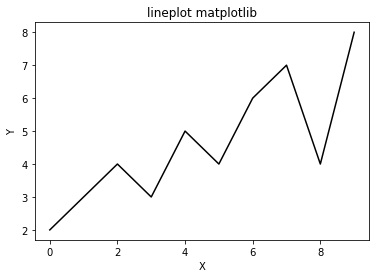

In [47]:
plt.plot(x, y, color='black')
plt.title('lineplot matplotlib')
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("꺾은선 그래프")

##### 3.3.4 seaborn과 pyplot을 이용한 꺾은선 그래프

In [48]:
import seaborn as sns
sns.set() #그래프의 디자인이 바뀜

Text(0, 0.5, 'y')

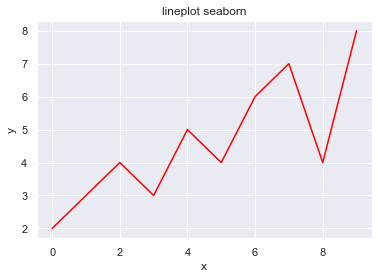

In [49]:
plt.plot(x,y,color='red')
plt.title("lineplot seaborn")
plt.xlabel("x")
plt.ylabel("y")

##### 3.3.5 seaborn을 이용한 히스토그램

In [50]:
fish_data=np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

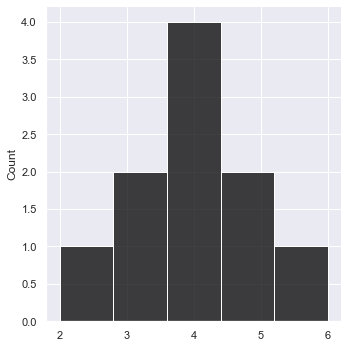

In [53]:
sns.displot(fish_data, bins=5,color='black',kde=False) #bins는 구간나눔, kde=False는 커널밀도추정을 하지않겠다고

##### 3.3.6 커널밀도추정에 따른 히스토그램 평활화
- 커널밀도추정이 필요한 이유?
- 히스토그램의 문제는 구간을 어떻게 정하느냐에 따라 모양이 크게 바뀐다

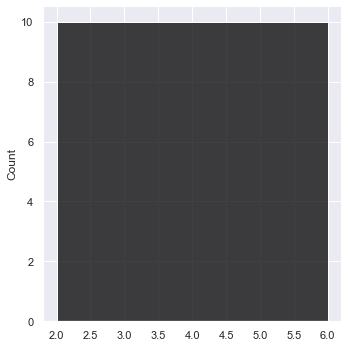

In [54]:
sns.displot(fish_data, bins=1, color='black', kde=False) #구간을 1로 설정, 커널밀도추정x

c:\users\82102\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

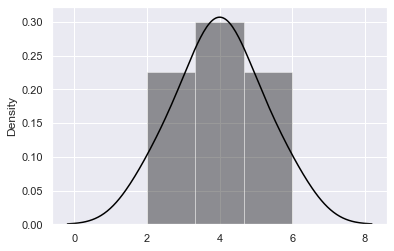

In [59]:
sns.distplot(fish_data,color='black') #커널밀도추정의 결과 표시

##### 3.3.7 2변량 데이터에 대한 히스토그램
- 히스토그램을 겹쳐서 그려보자

In [60]:
fish_multi=pd.read_csv("3-3-2-fish_multi_2.csv")
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [61]:
fish_multi.groupby("species").describe() #종류별 통계량 계산

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [62]:
#종류별 몸길이 데이터 추출
length_a=fish_multi.query("species == 'A'")["length"]
length_b=fish_multi.query("species == 'B'")["length"]

c:\users\82102\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length'>

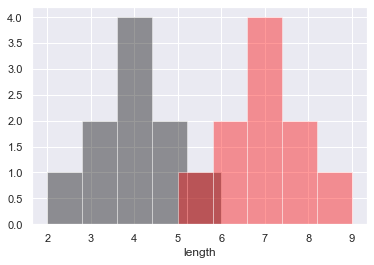

In [63]:
sns.distplot(length_a,bins=5,color='black',kde=False)
sns.distplot(length_b,bins=5,color='red',kde=False)

##### 3.3.8 다변량 데이터를 시각화하는 코드 작성
- 1변량 데이터로 나누어 표시하지 말고 다변량 데이터를 효율적으로 표시하자
 >sns.함수명(  
 >    x = "x축의 열 이름",  
 >    y = "y축의 열 이름",   
 >    data = 데이터프레임,   
 >    그_외의_인수  
 > ) 

##### 3.3.9 상자그림
- 카테고리 변수 x 수치형 변수
- 박스플롯으로 나타내자

<AxesSubplot:xlabel='species', ylabel='length'>

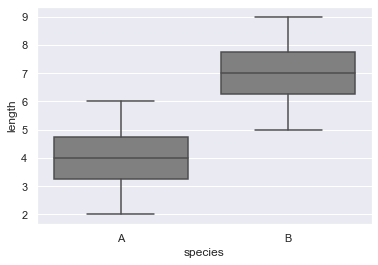

In [64]:
sns.boxplot(x="species",y="length",data=fish_multi,color='gray')
#상자의 중심선은 중앙값
#상자의 윗단과 아랫단은 각각 75%, 25% 사분위점
#수염은 데이터의 범위를 나타냄

##### 3.3.10 바이올린플롯
- 상자그림 대신 커널밀도추정의 결과를 사용

<AxesSubplot:xlabel='species', ylabel='length'>

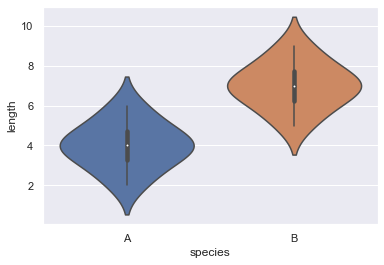

In [65]:
sns.violinplot(x="species",y="length",data=fish_multi,colot='gray')
#상자 대신 히스토그램을 세로로 세워서 배치한 상자그림
#어느 부분에 데이터가 집중되어 있는지 정보가 추가됨

##### 3.3.11 막대그래프
- 각 막대의 높이는 평균값
- 검은 선은 error bar 라고 하며 신뢰구간을 표시함
- 상자그림과 비교했을 때 정보가 적다

<AxesSubplot:xlabel='species', ylabel='length'>

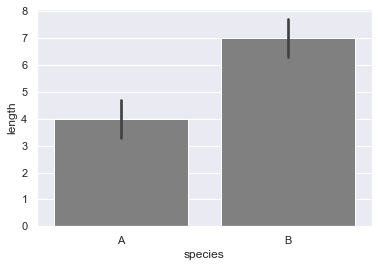

In [66]:
sns.barplot(x="species",y="length",data=fish_multi,color='gray')

##### 3.3.12 산포도
- 수치형 변수 x 수치형 변수'

In [67]:
cov_Data=pd.read_csv("3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


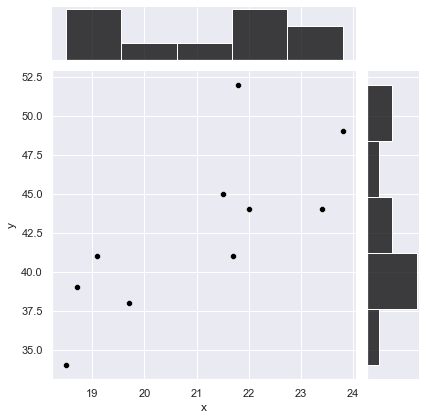

In [68]:
#히스토그램이 붙어있는 산포도
sns.jointplot(x="x",y="y",data=cov_data,color='black')

##### 3.3.13 페어플롯
- 많은 양의 변수를 가지고 있는 데이터의 그래프를 그리자

In [69]:
iris=sns.load_dataset("iris")
iris.head(n=3) #세줄만 출력

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [70]:
iris.groupby("species").mean() #종류별, 특징별 평균값을 구해보자

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


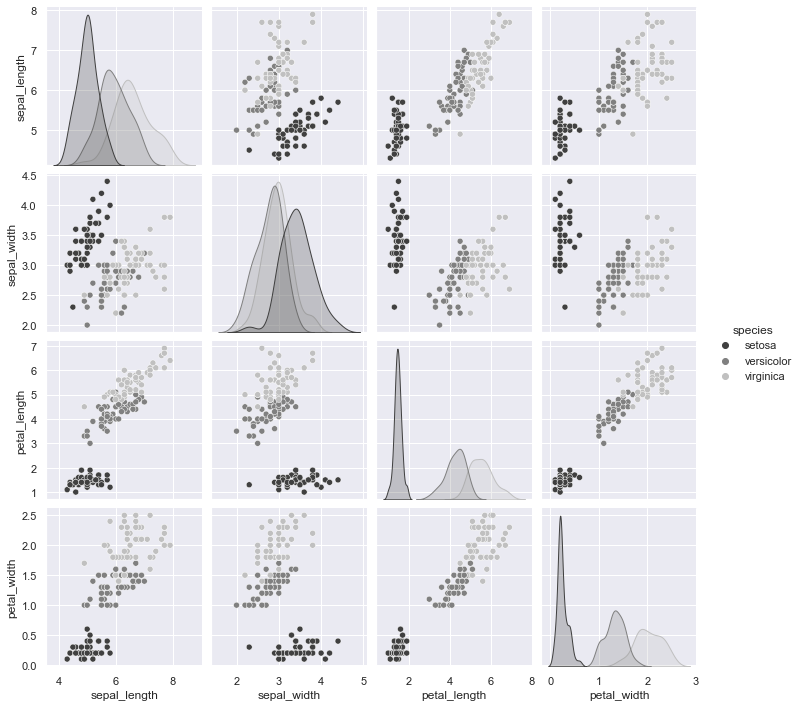

In [74]:
#pairplot 함수 데이터 프레임만 넘기면 산포도 그림
#hue="카테고리 변수의 열 이름"을 인수로 넘기면 카테고리별로 색을 나누어 그래프 그려줌
sns.pairplot(iris, hue="species",palette="gray")